In [12]:
import numpy as np
import pandas as pd
import re

# Para visualizar
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import bokeh.plotting as bkplt
from bokeh.io import output_file, show
from bokeh.layouts import gridplot, column
from bokeh.models import HoverTool, Div


#contenido
from nltk.corpus import stopwords
from wordcloud import WordCloud
import emoji
from collections import Counter

In [14]:
#ingresar el nombre del archivo que van a analizar
file = open(r'C:/Users/Ariel Fleiderman\Downloads/Chat de WhatsApp con Solo sé que no se nada.txt',mode='r',encoding="utf8")
data = file.read()
file.close()

In [15]:
def split_text(data):
  ##  Generamos una linea por cada salto de linea.

    return data.splitlines()

In [16]:
LineasChat = split_text(data)

In [17]:
len(LineasChat)

4609

In [18]:
def fecha(LineasChat):
    fecha = []
    regTime = re.compile("\d+/\d+/\d+")
    for index, line in enumerate(LineasChat):
        matches = re.findall(regTime, line)
        if(len(matches) > 0):
            fecha.append(matches[0])
        else:
            fecha.append(None)
    return fecha

In [19]:

#extraigo el mensaje con regex (todo lo que esté despues del remitente, hasta el salto de linea)
def mensaje(LineasChat):
    mensaje = []
    msgRegex = re.compile('.*?-\s[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?:\s+(.+)')
    for index, line in enumerate(LineasChat):
        matches = re.findall(msgRegex, line)
        if(len(matches) > 0):
            mensaje.append(matches[0])
        else:
            mensaje.append(None)

            
    return mensaje

In [20]:
def rtte(LineasChat):
    sender = []
    rtteRegex = re.compile('.*?-\s([a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?):\s+')
    for index, line in enumerate(LineasChat):
        matches = re.findall(rtteRegex, line)
        if(len(matches) > 0):
            sender.append(matches[0])
        else:
            sender.append(None)
            
    return sender

In [21]:

#extraigo el mensaje con regex (todo lo que esté despues del remitente, hasta el salto de linea)
def mensaje(LineasChat):
    mensaje = []
    msgRegex = re.compile('.*?-\s[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?[a-zA-Z0-9]+\s?:\s+(.+)')
    for index, line in enumerate(LineasChat):
        matches = re.findall(msgRegex, line)
        if(len(matches) > 0):
            mensaje.append(matches[0])
        else:
            mensaje.append(None)

            
    return mensaje

In [22]:
fecha = fecha(LineasChat)
senders = rtte(LineasChat)
mensaje = mensaje(LineasChat)

In [23]:
zipped = list(zip(fecha, senders, mensaje))

In [24]:
#armo dataframe, tiro los nan (casos en que el mensaje tenia saltos de linea), y reseteo el index
df = pd.DataFrame(zipped, columns = ['Fecha' ,'Remitente', 'Mensaje'])
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [25]:
df.head()

,Fecha,Remitente,Mensaje
0,6/1/20,Ari,Hola quieren organicemos una merienda?
1,6/1/20,Ari,Si no nos vemos en lo de esteban
2,6/1/20,Aldi,Holissss
3,6/1/20,Aldi,Siiii!
4,6/1/20,Aldi,Yo después de las 18h puedo


In [32]:

df1 = df.copy()     
df1['message_count'] = [1] * df1.shape[0] 
df1 = df1.groupby('Fecha').sum().reset_index() 
df1

,Fecha,message_count
0,1/10/20,21
1,1/4/20,42
2,1/5/20,186
3,10/10/20,8
4,10/4/20,137
...,...,...
155,9/10/20,11
156,9/3/20,33
157,9/4/20,114
158,9/8/20,37


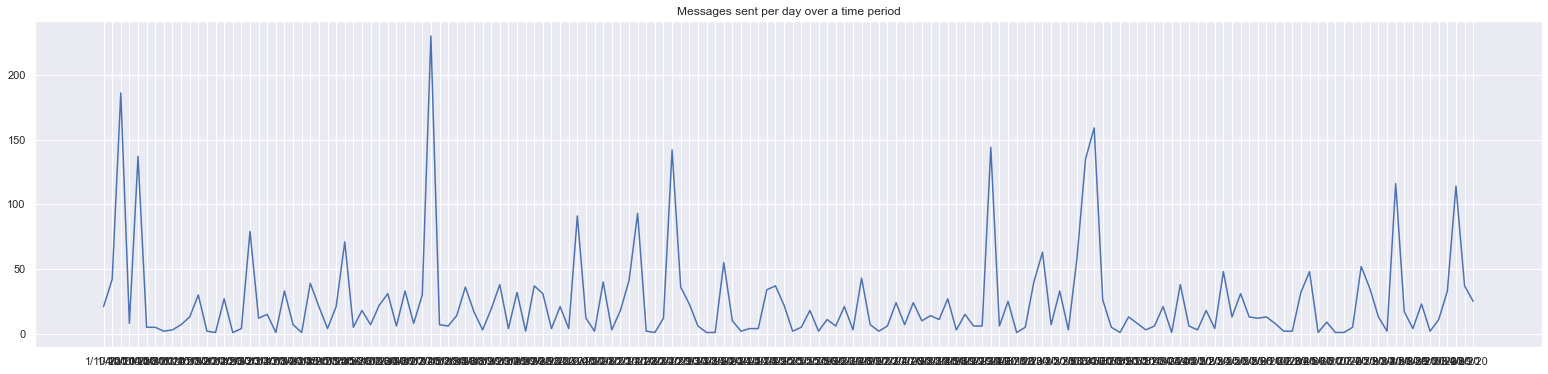

In [33]:

sns.set_style("darkgrid")
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`

plt.plot(df1.Fecha, df1.message_count)
plt.title('Messages sent per day over a time period');

plt.savefig('msg_plots.svg', format = 'svg')

In [34]:

top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

,Fecha,message_count
0,17/4/20,230
1,1/5/20,186
2,30/4/20,159
3,29/3/20,144
4,22/4/20,142
5,10/4/20,137
6,30/3/20,135
7,8/4/20,116
8,9/4/20,114
9,21/4/20,93


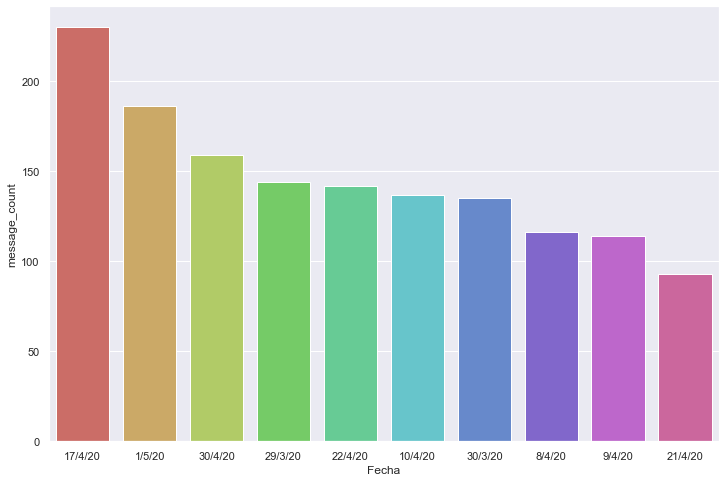

In [36]:
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# A bar plot for top 10 days
sns.barplot(top10days.Fecha, top10days.message_count, palette="hls");

# Saving the plots
plt.savefig('top10_days.svg', format = 'svg')

In [39]:
df2 = df.copy()    
df2 = df2[df2.Remitente != "group_notification"]
top10df = df2.groupby("Remitente")["Mensaje"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,Remitente,Mensaje
0,Ari,1460
1,Mica Blejer,707
2,Day,645
3,Ornella,478
4,Aldi,382
5,Joy,216
6,Kev,95


In [40]:
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

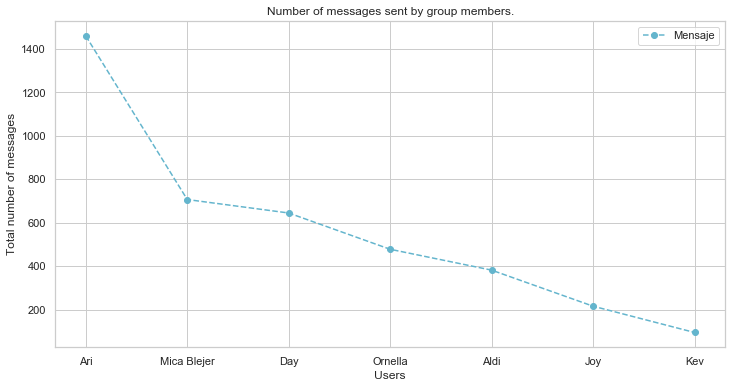

In [44]:

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))


plt.plot(top10df.Remitente, top10df.Mensaje, 'o--c')  



plt.xlabel('Users')
plt.ylabel('Numero total de mensajes')

plt.title("Number of messages sent by group members.")
plt.legend(['Mensaje']);

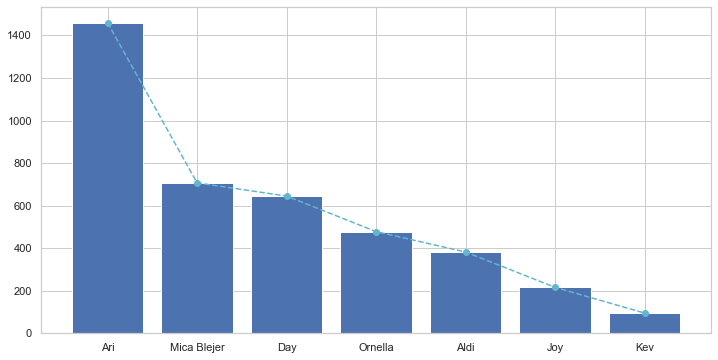

In [47]:
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))

plt.bar(top10df.Remitente, top10df.Mensaje)   
plt.plot(top10df.Remitente, top10df.Mensaje, 'o--c');  


In [78]:
df2['largo_mensaje'] = df2['Mensaje'].apply(lambda x: len(x))      

In [79]:
largo_mensajes_promedio = df2.groupby(df2.Remitente).mean().reset_index().sort_values(by = 'largo_mensaje', ascending = False)
print(largo_mensajes_promedio)


     Remitente  largo_mensaje  message_length
6      Ornella      40.698745       40.698745
2          Day      33.497674       33.497674
0         Aldi      29.591623       29.591623
1          Ari      27.453425       27.453425
3          Joy      26.847222       26.847222
4          Kev      26.294737       26.294737
5  Mica Blejer      25.575672       25.575672


In [80]:
df2.head()

,Fecha,Remitente,Mensaje,largo_mensaje,message_length
0,6/1/20,Ari,Hola quieren organicemos una merienda?,38,38
1,6/1/20,Ari,Si no nos vemos en lo de esteban,32,32
2,6/1/20,Aldi,Holissss,8,8
3,6/1/20,Aldi,Siiii!,6,6
4,6/1/20,Aldi,Yo después de las 18h puedo,27,27


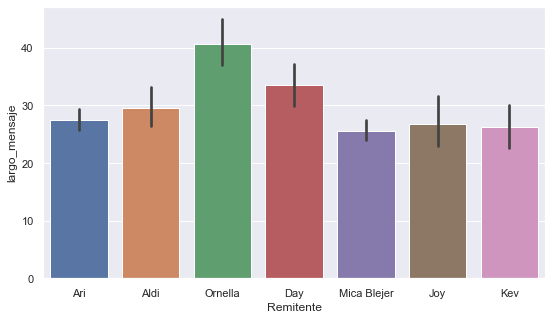

In [82]:

sns.set_style("darkgrid")           
sns.barplot(df2.Remitente, df2.largo_mensaje, data=df2);

In [93]:

emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["Mensaje"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [105]:
top10emojis = pd.DataFrame()
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    description = emoji.demojize(item[0])[1:-1] 
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added 

,emoji,emoji_count,emoji_description
0,🏻,149,light_skin_tone
1,😍,101,smiling_face_with_heart-eyes
2,👏,81,clapping_hands
3,❤,42,red_heart
4,🎉,35,party_popper
5,😂,35,face_with_tears_of_joy
6,😱,33,face_screaming_in_fear
7,👍,32,thumbs_up
8,😘,27,face_blowing_a_kiss
9,🥰,26,smiling_face_with_3_hearts


In [114]:
df2['Cant letras'] = df2['Mensaje'].apply(lambda s : len(s))
df2['Cant Palabras'] = df2['Mensaje'].apply(lambda s : len(s.split(' ')))

In [116]:
df2totales = df2.groupby(["Fecha", "Remitente"]).agg(CantMsg=('Mensaje', 'count'), CantPalabras=('Cant Palabras', 'sum')).reset_index()

In [119]:
totales.index = pd.DatetimeIndex(totales.Fecha, dayfirst=True)
totales.drop("Fecha", axis=1, inplace=True)

In [120]:
totales['month'] = [d.strftime('%b') for d in totales.index]
totales['day'] = [d.strftime('%A') for d in totales.index]
totales = totales.sort_values(by = "Fecha")

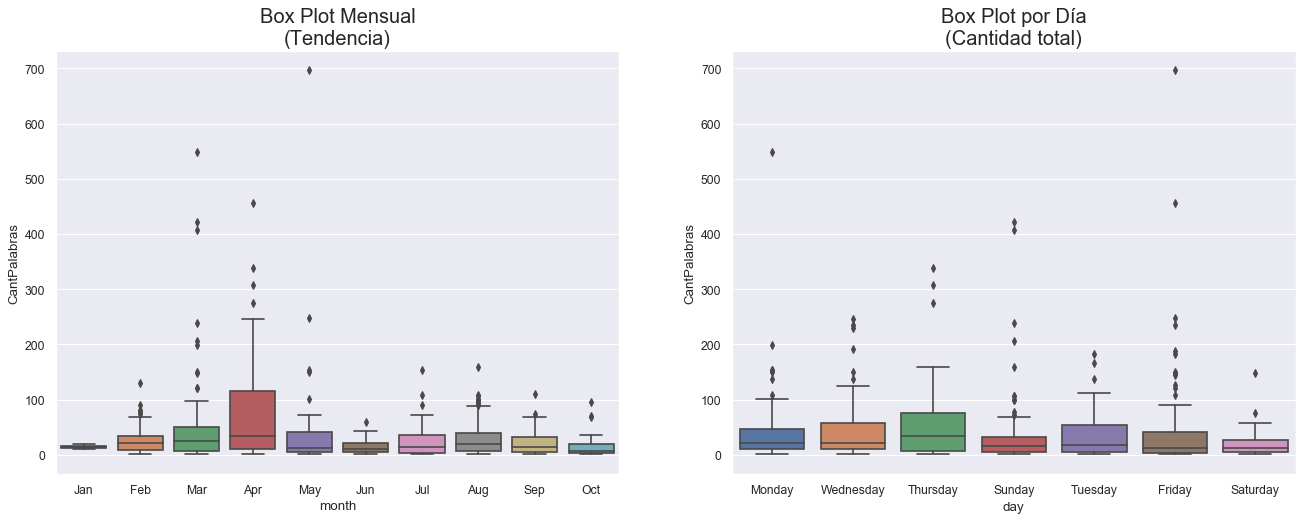

In [123]:

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='month', y="CantPalabras", data=totales, ax=axes[0])
sns.boxplot(x='day', y='CantPalabras', data=totales)

axes[0].set_title('Box Plot Mensual\n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot por Día\n(Cantidad total)', fontsize=18)
plt.show()

In [137]:
textomensajes = df2['Mensaje'].to_string().lower()
a,b = 'áéíóúü','aeiouu'
trans = str.maketrans(a,b)

textomensajes = textomensajes.translate(trans)

In [139]:
textomensajes = re.sub('\s*(j*a*ja\w*)\s\w*|(j*a*ja\w*)$', '\\1-jajaja ', textomensajes)

In [140]:
stop_words_sp = set(stopwords.words('spanish'))
stop_words_sp.update(["sip","nono","ahh", "ahhh","meno","ay","tene","nooo","ir","asi","tenia","iba","ser","estan","https","jajaj","pa", "eh", "si", "no", "ah", "che", "sisi", "sii","siii","aca","ahi","ahí","tmb","encima","re","desp","nah","tan", "siiii","oki","re","dp","porq","xq","tb","do","ma","capaz","so","vo","solo", "https", "http", "www"
                     ,"ary", "ok","hola"])


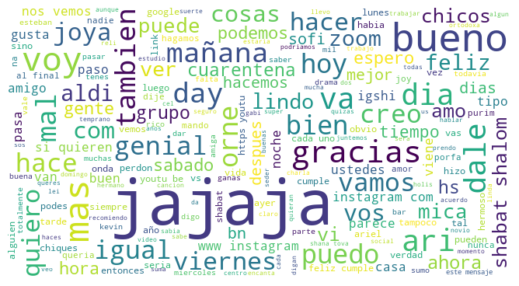

In [141]:
# Generate a word cloud image, 
wordcloud = WordCloud(stopwords=stop_words_sp, background_color="white", width=650, height=350, max_font_size=80, collocation_threshold=100,  normalize_plurals=False).generate(textomensajes)
  # Display the generated image:
  # the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()